In [ ]:
import pandas as pd
import numpy as np
dataset={
    'Age':[22,23,28,36,500,np.nan,34,55,42,30],
    'Salary':[25000,50000,30000,40000,60000,100000,150000,np.nan,50000,80000],
    'Experience':[1,1,2,4,np.nan,4,5,12,10,-5]
}
df=pd.DataFrame(dataset)
print(df)

     Age    Salary  Experience
0   22.0   25000.0         1.0
1   23.0   50000.0         1.0
2   28.0   30000.0         2.0
3   36.0   40000.0         4.0
4  500.0   60000.0         NaN
5    NaN  100000.0         4.0
6   34.0  150000.0         5.0
7   55.0       NaN        12.0
8   42.0   50000.0        10.0
9   30.0   80000.0        -5.0


In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Salary'].fillna(df['Salary'].median(),inplace=True)
df['Experience'].fillna(df['Experience'].median(),inplace=True)
print(df)

     Age    Salary  Experience
0   22.0   25000.0         1.0
1   23.0   50000.0         1.0
2   28.0   30000.0         2.0
3   36.0   40000.0         4.0
4  500.0   60000.0         4.0
5   34.0  100000.0         4.0
6   34.0  150000.0         5.0
7   55.0   50000.0        12.0
8   42.0   50000.0        10.0
9   30.0   80000.0        -5.0


<ipython-input-65-79ed2a94e254>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
<ipython-input-65-79ed2a94e254>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
df['Experience']=df['Experience'].apply(lambda x: abs(x) if x<0 else x)
print(df['Experience'])

0     1.0
1     1.0
2     2.0
3     4.0
4     4.0
5     4.0
6     5.0
7    12.0
8    10.0
9     5.0
Name: Experience, dtype: float64


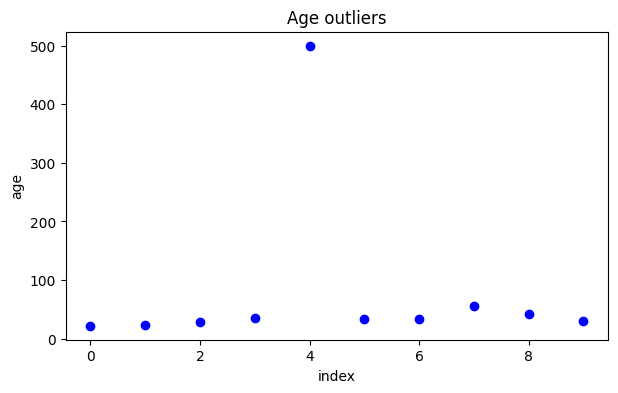

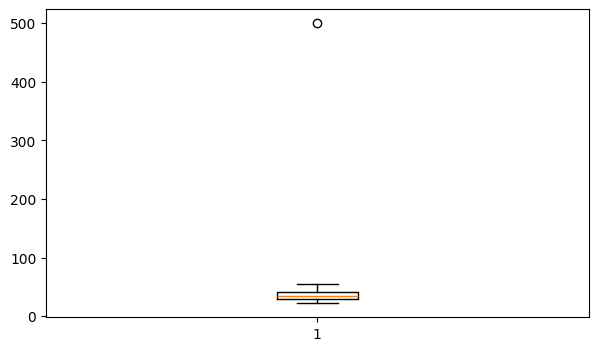

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,4))
plt.scatter(df.index,df['Age'],marker='o',color='Blue')
plt.xlabel("index")
plt.ylabel("age")
plt.title("Age outliers")
plt.show()
fig= plt.figure(figsize=(7,4))
plt.boxplot(df['Age'])
plt.show()

In [ ]:
from scipy import stats
z_score= np.abs(stats.zscore(df))
outlier=(z_score>2.5)
print(z_score)
print(outlier)
df['Z_score']=z_score['Age']
outlier_rows = df[outlier.any(axis=1)]
print(outlier_rows)
# print(~outlier)


        Age    Salary  Experience
0  0.416662  1.076003    1.108103
1  0.409528  0.377300    1.108103
2  0.373855  0.936262    0.816497
3  0.316777  0.656781    0.233285
4  2.993690  0.097818    0.233285
5  0.331047  1.020106    0.233285
6  0.331047  2.417512    0.058321
7  0.181220  0.377300    2.099563
8  0.273970  0.377300    1.516351
9  0.359585  0.461144    0.058321
     Age  Salary  Experience
0  False   False       False
1  False   False       False
2  False   False       False
3  False   False       False
4   True   False       False
5  False   False       False
6  False   False       False
7  False   False       False
8  False   False       False
9  False   False       False
     Age   Salary  Experience  Z_score
4  500.0  60000.0         4.0  2.99369


In [ ]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR= Q3-Q1
outlier=(df['Age']<(Q1-1.5*IQR))|(df['Age']>(Q3+1.5*IQR))
print(outlier)

print((Q1-1.5*IQR))
print((Q3+1.5*IQR))

outlier_rows = df[outlier]
print(outlier_rows)

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: Age, dtype: bool
10.5
58.5
     Age   Salary  Experience  Z_score
4  500.0  60000.0         4.0  2.99369
